## Introduction

Stack Exchange is a network of question-and-answer websites on topics in diverse fields. It is a  hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and most importantly data science! In this project, we will investigate the data available on Stack Exchange Data Science (DSSE) to uncover some of the most popular topics on the sight. This information will give us insights on what are the relevent topics in the field of data science to give suggestions on what education contents we can make to help out people that are learning to become a data scientist.

## Results Summary

We findout that 
* The most asked topic on DSSE are toics that related to deep learning and pythong.
* We should making tutorials of Python contents that use deep learning.

For more details, please refer to the the full analysis below.

## To get the relevant data we run the following query.
Stack Exchange provides a public data base for each of its websites. Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database. To get the relevant data we run the following query.

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
       
FROM posts

WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2020;

We save the data in '2020_questions.csv'.

## Exploring the Data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# read in the data
questions = pd.read_csv("2020_questions.csv", parse_dates=["CreationDate"])

Our dataframe has the following column:

* Id: An identification number for the post.
* PostTypeId: An identification number for the type of post.
* CreationDate: The date and time of creation of the post.
* Score: The post's score.
* ViewCount: How many times the post was viewed.
* Tags: What tags were used.
* AnswerCount: How many answers the question got (only applicable to question posts).
* FavoriteCount: How many times the question was favored (only applicable to question posts).

Investigate missing value and data type of the datafarm 

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6663 entries, 0 to 6662
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6663 non-null   int64         
 1   CreationDate   6663 non-null   datetime64[ns]
 2   Score          6663 non-null   int64         
 3   ViewCount      6663 non-null   int64         
 4   Tags           6663 non-null   object        
 5   AnswerCount    6663 non-null   int64         
 6   FavoriteCount  998 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 364.5+ KB


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats, and Tags object type need further investigation to see what types the objects in questions["Tags"] are.

In [4]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string.

In [5]:
questions["Tags"].head()

0         <machine-learning><time-series><forecasting>
1                     <machine-learning><ai><research>
2    <keras><lstm><sequence-to-sequence><attention-...
3             <nlp><pandas><preprocessing><python-3.x>
4                                <matplotlib><f1score>
Name: Tags, dtype: object

For the ease of doing data analysis, we will reformat the the strings in Tag so we can create a list of tag for each row

## Data Cleaning

We'll begin by fixing FavoriteCount.

In [6]:
# fill in na values with 0
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
# change data type to int
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

Let's modify the Tags column like we mention above

In [7]:
# remove '<' at the beginning and '>' at the end of the string
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "")
# split at'><' to make each row into a list
questions["Tags"] = questions["Tags"].str.split("><")
questions.head()

<ipython-input-7-10901a83800a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  questions["Tags"] = questions["Tags"].str.replace("^<|>$", "")


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,74355,2020-05-17 17:04:30,2,39,"[machine-learning, time-series, forecasting]",1,0
1,74356,2020-05-17 17:25:39,0,57,"[machine-learning, ai, research]",1,0
2,74360,2020-05-17 19:11:57,1,126,"[keras, lstm, sequence-to-sequence, attention-...",1,0
3,74362,2020-05-17 21:35:57,0,29,"[nlp, pandas, preprocessing, python-3.x]",1,0
4,74363,2020-05-17 22:07:26,3,24,"[matplotlib, f1score]",1,0


## Most Used and Most Viewed Tag

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We'll begin by counting how many times each tag was used

In [8]:
# make a dictionary to count how many times each tag was used
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
# make tag_count into dataframe to prepare for visualization            
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
# sort the data by 'Count'
tag_count.sort_values(by="Count")

,Count
dynamic-time-warping,1
.net,1
wikipedia,1
rust,1
nlg,1
...,...
keras,601
neural-network,763
deep-learning,949
python,1270


There 526 unique tags in total but their counts seems to be decreasing quite rapidly. So picking out about 20 of the most use tags for further analysis should be enough for now.

In [9]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
feature-selection,185
predictive-modeling,189
r,202
clustering,221
statistics,231
pandas,251
lstm,263
dataset,266
cnn,309
regression,324


Let's do a bar plot for these data

<AxesSubplot:>

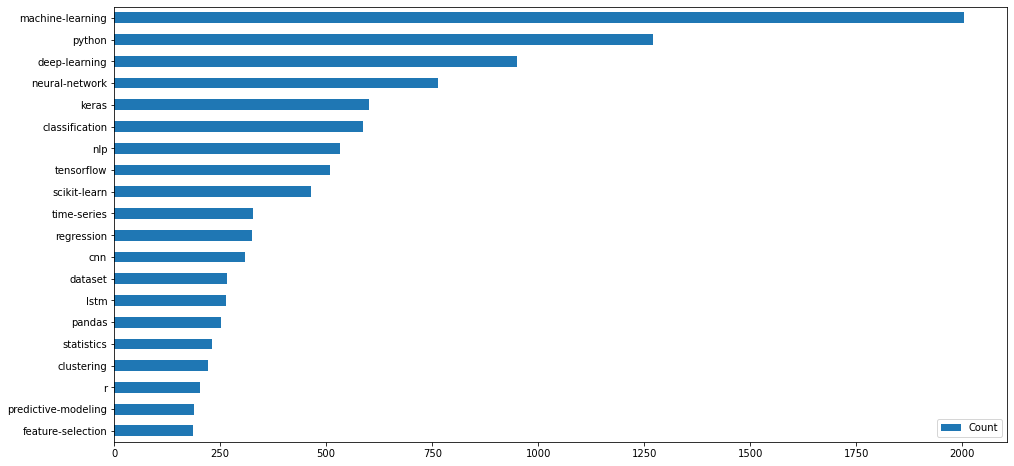

In [16]:
most_used.plot(kind="barh",figsize=(16,8))

machine learning, python, deep-learning, neural-network and keras are the top 5 most popular topics on DSSE. 

We know that deep-learning is a type of neural-network which is a more advance machine-learning technique and keras is a package that is available in python for deep learning.

This result suggests that deep learning is the most popular topic in machine learning and most people were using the keras package on python to perform deep learning tasks.

Let's investigate the number of view for each tag.

We'll need to use pandas's pandas.DataFrame.iterrows() for this task.

<AxesSubplot:>

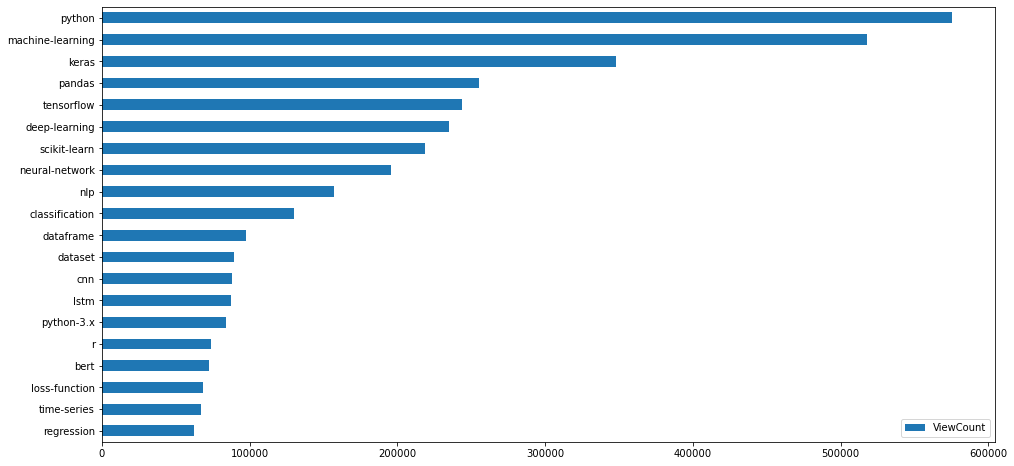

In [18]:
# make a dictionary to count how many times each tag was viewed
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
# make tag_view_count into dataframe          
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)
# sort by "ViewCount" and pick the top 20 results
most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)
# Create bar plot
most_viewed.plot(kind="barh", figsize=(16,8))

python, machine learning, keras, deep-learning, pandas are the top 5 most viewed topics on DSSE.

This seem to reinforce our hypothesis from above. We can further strenthen our claim by investigate into the relationships among tags especially those top tags.

## Relations Among Tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

We'll begin by creating a list of all tags.

In [19]:
all_tags = list(tag_count.index)

We'll now create a dataframe where each row and column will represent a tag.

In [20]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,time-series,forecasting,ai
machine-learning,NaN,NaN,NaN,NaN
time-series,NaN,NaN,NaN,NaN
forecasting,NaN,NaN,NaN,NaN
ai,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intersecting tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [21]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1
    
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,feature-selection,predictive-modeling,r,clustering,statistics,pandas,lstm,dataset,cnn,regression,time-series,scikit-learn,tensorflow,nlp,classification,keras,neural-network,deep-learning,python,machine-learning
feature-selection,185,6,5,6,7,6,3,5,1,8,2,21,0,5,9,2,15,14,28,71
predictive-modeling,6,189,5,7,18,3,5,9,1,23,22,7,3,2,27,2,10,14,36,86
r,5,5,202,11,13,1,2,10,0,15,10,0,2,6,11,6,11,2,24,50
clustering,6,7,11,221,3,2,0,5,0,4,8,18,3,11,19,0,2,4,46,51
statistics,7,18,13,3,231,3,2,14,0,18,15,6,3,6,15,1,8,17,28,88
pandas,6,3,1,2,3,251,1,20,0,3,11,26,0,8,2,3,2,0,154,23
lstm,3,5,2,0,2,1,263,2,13,7,66,0,34,23,7,80,48,76,35,62
dataset,5,9,10,5,14,20,2,266,7,12,16,9,14,15,21,10,16,27,34,79
cnn,1,1,0,0,0,0,13,7,309,4,10,3,50,4,18,77,73,117,36,72
regression,8,23,15,4,18,3,7,12,4,324,27,37,7,4,35,18,26,17,57,110


The dataframe is quite big and hard to read. Let's create a heatmap to help us analyze the data. But first, we will remove the main diagonal line (the longest diagonal line of the dataframe) so the colors won't be too skewed.

In [22]:
# remove the diagonal line 
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

<ipython-input-22-0820332112cf>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  relations_most_used.iloc[i,i] = pd.np.NaN


<AxesSubplot:>

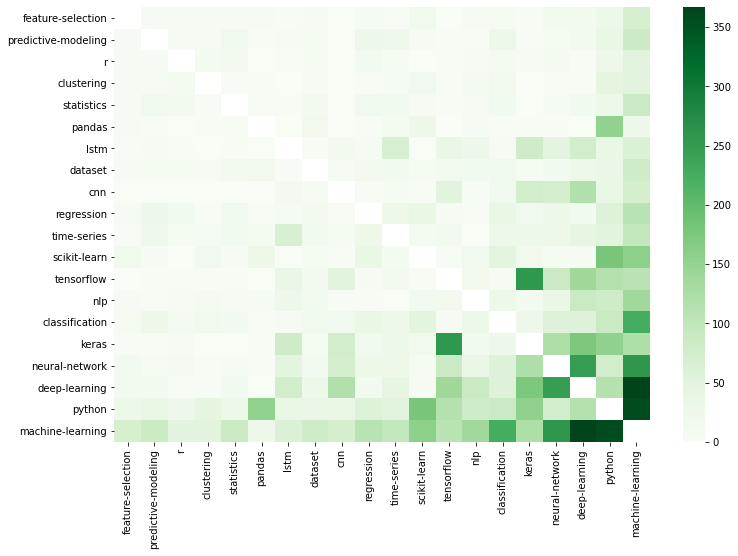

In [23]:
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens")

From the top 10 tags of each, here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

Fortunately, it is well known that Keras, scikit-learn, TensorFlow are all libraries available in python that allow their users to employ deep learning(a type of neural network) and classification is a class of unsupervised learning problem that can solve by deep-learning. So the top tags are indeed relate to one another with one central machine learning theme: deep learning, and our analysis further confirm this.

## Tracking the 'Deep-Learning' trend

It seem like Deep Learning contents is pretty popular as of 2020. But before we officially make our recommendation, it would be nice to solidify our findings with additional proof. Ideally, the content we decide to create will be the most useful for as long as possible. We should check to make sure that the interest in deep learning isn't slowing down.

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

SELECT Id, CreationDate, Tags

FROM posts

WHERE PostTypeId = 1;

We save the data in "all_questions.csv".

Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.

In [27]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [28]:
# clean the 'Tags' column
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

<ipython-input-28-43a7765d980b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


We can classify a deep learning tag is a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise

In [29]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [30]:
# Apply our function to the Tags column to create a Deep-learning column that
# classify deep-learning tags
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)
all_q.head()

,Id,CreationDate,Tags,DeepLearning
0,28692,2018-03-06 08:55:20,"[machine-learning, machine-learning-model]",0
1,28705,2018-03-06 13:29:06,"[python, neural-network, keras, convolution]",1
2,28711,2018-03-06 15:28:42,"[python, clustering, lda]",0
3,28712,2018-03-06 15:35:47,"[machine-learning, neural-network, deep-learni...",1
4,28714,2018-03-06 16:06:27,"[deep-learning, nlp, keras, machine-translation]",1


Since the data science techonology doesn't progress too fast, it is safe to track the trend of deep-learning quaterly.

Let's create a column that identifies the quarter in which a question was asked.

In [31]:
def fetch_quarter(datetime):
    year = str(datetime.year)
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [32]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,28692,2018-03-06 08:55:20,"[machine-learning, machine-learning-model]",0,2018Q1
1,28705,2018-03-06 13:29:06,"[python, neural-network, keras, convolution]",1,2018Q1
2,28711,2018-03-06 15:28:42,"[python, clustering, lda]",0,2018Q1
3,28712,2018-03-06 15:35:47,"[machine-learning, neural-network, deep-learni...",1,2018Q1
4,28714,2018-03-06 16:06:27,"[deep-learning, nlp, keras, machine-translation]",1,2018Q1


We'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [33]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# reset the quarterly dataframe index
quarterly.reset_index(inplace=True)
quarterly.head()

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,2014Q2,9,157,0.057325
1,2014Q3,13,188,0.069149
2,2014Q4,21,214,0.098131
3,2015Q1,17,188,0.090426
4,2015Q2,28,284,0.098592


Let's make a plot to track the rate that deep-learning tags appear in question and the total number of questions by quarter

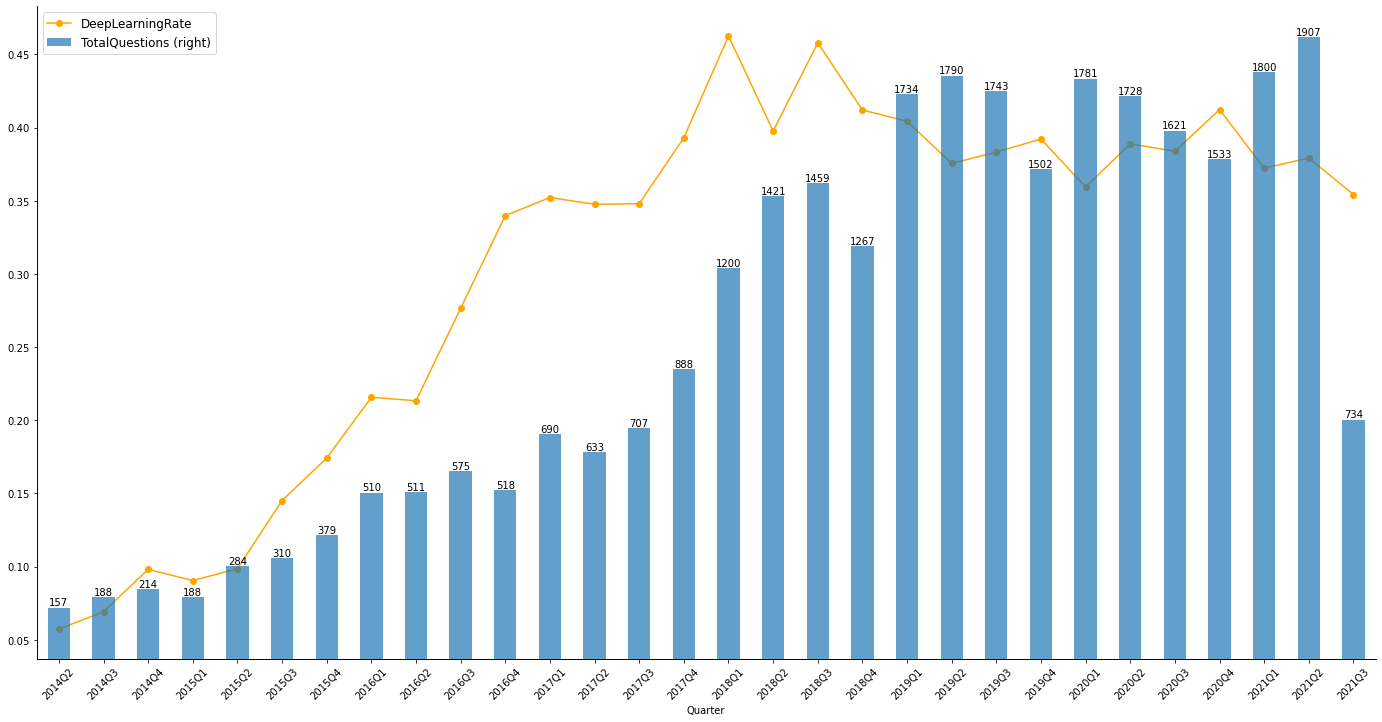

In [34]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


Note that we don't have the full data for Q3 of 2021. The rate of people asking deep learning questions has slightly going down from Q4 of 2020 but has since, started to increase again from Q1 of 2021 to Q2 of 2021. Overall the rate at which people inquire about deep learning are consistently high for the past 2 years(over 35% of questions on DSSE are about deep learning), and continue to stay high at the beginning of Q3 of 2021 (almost 35% of the questions being asked are deep learning question). This indicates that there is no evidence to suggest that interest in deep learning is decreasing and it will continue to be a relevent topic in data science.

So we can confidently make our suggestion of creation of more Python contents that use deep learning. For example, A tutorial on how to solve a perticular classification problems using keras library on python should be an excellent lecture to make.